In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
bank_data=pd.read_csv("BankChurners.csv")

In [4]:
bank_data=bank_data.iloc[:,:-2]

In [5]:
#drooping Clientnum
bank_data.drop(columns="CLIENTNUM",inplace=True)


In [6]:
bank_data.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [10]:
bank_data.plot(kind="pie",y="Attrition_Flag",figsize=(10,10),autopct='%1.1f%%',startangle=90,shadow=True,labels=bank_data["Attrition_Flag"].unique(),legend=False)

TypeError: '<' not supported between instances of 'str' and 'int'

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [8]:
x = bank_data.drop('Attrition_Flag', axis=1)
y = label_encoder.fit_transform(bank_data['Attrition_Flag'])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=0)

In [15]:
def data_preprocessor(X,y):
        """Function to Prepocess the data """
        numeric_transformer = Pipeline(
                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
            )

        categorical_transformer = OneHotEncoder(handle_unknown="ignore")
        preprocessor = ColumnTransformer(
                transformers=[
                    ("numeric", numeric_transformer, X.select_dtypes(np.number).columns.tolist()),
                    ("category", categorical_transformer,X.select_dtypes("object").columns.tolist()),
                ]
            )
        return preprocessor

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_regression


In [41]:
preprocessor=data_preprocessor(xtrain,ytrain)

In [46]:
    
feature_selector = Pipeline(
                        steps=[("preprocessor", preprocessor),
                        ("feature", SelectKBest(f_regression,k=10))])
feature_selector.fit(xtrain,ytrain)
xopt=feature_selector.get_feature_names_out()


array(['numeric__Total_Relationship_Count',
       'numeric__Months_Inactive_12_mon',
       'numeric__Contacts_Count_12_mon', 'numeric__Total_Revolving_Bal',
       'numeric__Total_Amt_Chng_Q4_Q1', 'numeric__Total_Trans_Amt',
       'numeric__Total_Trans_Ct', 'numeric__Total_Ct_Chng_Q4_Q1',
       'numeric__Avg_Utilization_Ratio', 'category__Gender_M'],
      dtype=object)

In [20]:

model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature_selector", SelectKBest(k=10)),
                    ("classifier", DecisionTreeClassifier())]
                 
                )
model_selector.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('feature_selector', SelectKBest()),
                ('classifier', DecisionTreeClassifier())])

In [38]:
# Get the feature selector from the pipeline
feature_selector = model_selector.named_steps['feature_selector']

# Get a boolean mask indicating which features were selected
selected_features_mask = feature_selector.get_support()

# # Get the original feature names from the preprocessor (assuming it's a feature-based transformer)
original_feature_names = preprocessor['feature_selector'].get_feature_names_out()

# # Get the selected feature names
# selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

# print("Selected Features:")
# print(selected_feature_names)

TypeError: 'ColumnTransformer' object is not subscriptable

In [35]:
feature_selector

SelectKBest()

In [21]:
ypred_decision_tree=model_selector.predict(xtest)


The Accuracy of the Model is 93.15564330371832


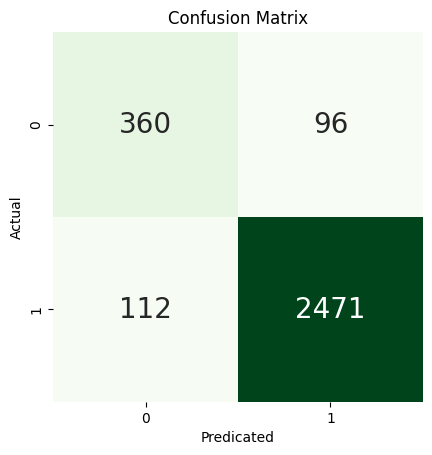

In [23]:
acuracy=accuracy_score(ytest,ypred_decision_tree)
print(f"The Accuracy of the Model is {acuracy*100}")
cmaxt=confusion_matrix(ytest,ypred_decision_tree,labels=[0,1])
sns_heat=sns.heatmap(cmaxt,cmap="Greens",annot=True, robust=True, cbar=False, square=True, annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:

from sklearn.model_selection import train_test_split,GridSearchCV

In [29]:
param_grid = {
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2, 3, 4],
    'classifier__random_state': [0, 42]
}
grid_model = GridSearchCV(model_selector, param_grid, cv=5, verbose=0, n_jobs=-1)
grid_model.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_Age',
                                                                          'Dependent_count',
                                                                          'Months_on_book',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Credit_Limit',
                                                                          'Total_Revolvi...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('feature_selector', SelectKBest()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7, 8],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__min_samples_split': [2, 3, 4],
                         'classifier__random_state': [0, 42]})

In [32]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('feature_selector', SelectKBest()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=8, random_state=0))])

The Accuracy of the Model is 93.55051003619612


Text(0.5, 1.0, 'Confusion Matrix For DECISION TREE with GridSearchCV')

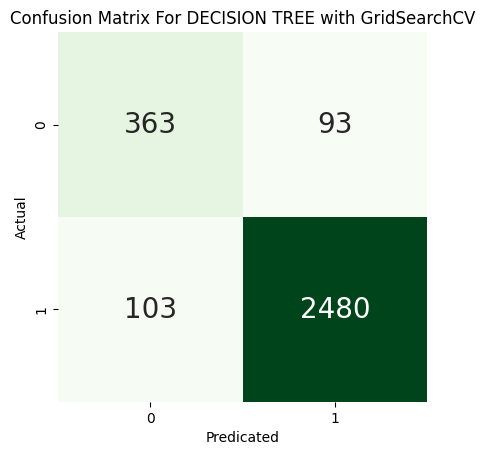

In [30]:
grid_model.predict(xtest)
ypred=grid_model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)
cmat=confusion_matrix(ytest,ypred,labels=[0,1])
print(f"The Accuracy of the Model is {accuracy*100}")
sns_heat=sns.heatmap(cmat,cmap="Greens",annot=True, robust=True, cbar=False, square=True, annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix For DECISION TREE with GridSearchCV")


In [48]:
    
feature_selector = Pipeline(
                        steps=[("preprocessor", preprocessor),
                        ("feature", SelectKBest(f_regression,k=10))])
feature_selector.fit(xtrain,ytrain)
xopt=feature_selector.get_feature_names_out()


In [49]:
xopt

array(['numeric__Total_Relationship_Count',
       'numeric__Months_Inactive_12_mon',
       'numeric__Contacts_Count_12_mon', 'numeric__Total_Revolving_Bal',
       'numeric__Total_Amt_Chng_Q4_Q1', 'numeric__Total_Trans_Amt',
       'numeric__Total_Trans_Ct', 'numeric__Total_Ct_Chng_Q4_Q1',
       'numeric__Avg_Utilization_Ratio', 'category__Gender_M'],
      dtype=object)

In [50]:
bank_data.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [53]:
5,1,1,2,3,5,6,7,8,1,M

0        5
1        6
2        4
3        3
4        5
        ..
10122    3
10123    4
10124    5
10125    4
10126    6
Name: Total_Relationship_Count, Length: 10127, dtype: int64

In [52]:
grid_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_Age',
                                                                          'Dependent_count',
                                                                          'Months_on_book',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Credit_Limit',
                                                                          'Total_Revolvi...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('feature_selector', SelectKBest()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7, 8],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__min_samples_split': [2, 3, 4],
                         'classifier__random_state': [0, 42]})

In [61]:
# grid_model.predict([[5,1,1,2,3,5,6,7,8,1,"M"]])
grid_model.predict([[45,"M",3,"High School","Married","$60K - $80K","Blue",39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061]])

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [62]:
custom_input_data = pd.DataFrame(
    [45,"M",3,"High School","Married","$60K - $80K","Blue",39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061])

grid_model.predict(custom_input_data)

KeyError: "None of [Index(['Customer_Age', 'Dependent_count', 'Months_on_book',\n       'Total_Relationship_Count', 'Months_Inactive_12_mon',\n       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',\n       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',\n       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],\n      dtype='object')] are in the [columns]"

In [63]:
custom_input_data = pd.DataFrame([5,1,1,2,3,5,6,7,8,1,"M"])
grid_model.predict(custom_input_data)
# grid_model.predict([[5,1,1,2,3,5,6,7,8,1,"M"]])

KeyError: "None of [Index(['Customer_Age', 'Dependent_count', 'Months_on_book',\n       'Total_Relationship_Count', 'Months_Inactive_12_mon',\n       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',\n       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',\n       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],\n      dtype='object')] are in the [columns]"